## Breast cancer prediction using Decission Tree

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

### Read the breast cancer data

In [3]:
data = load_breast_cancer()
dataset = pd.DataFrame(data=data["data"], columns=data["feature_names"])
features, targets = data.data, data.target

dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## EDA

<AxesSubplot:title={'center':'Triangle Correlation Heatmap'}>

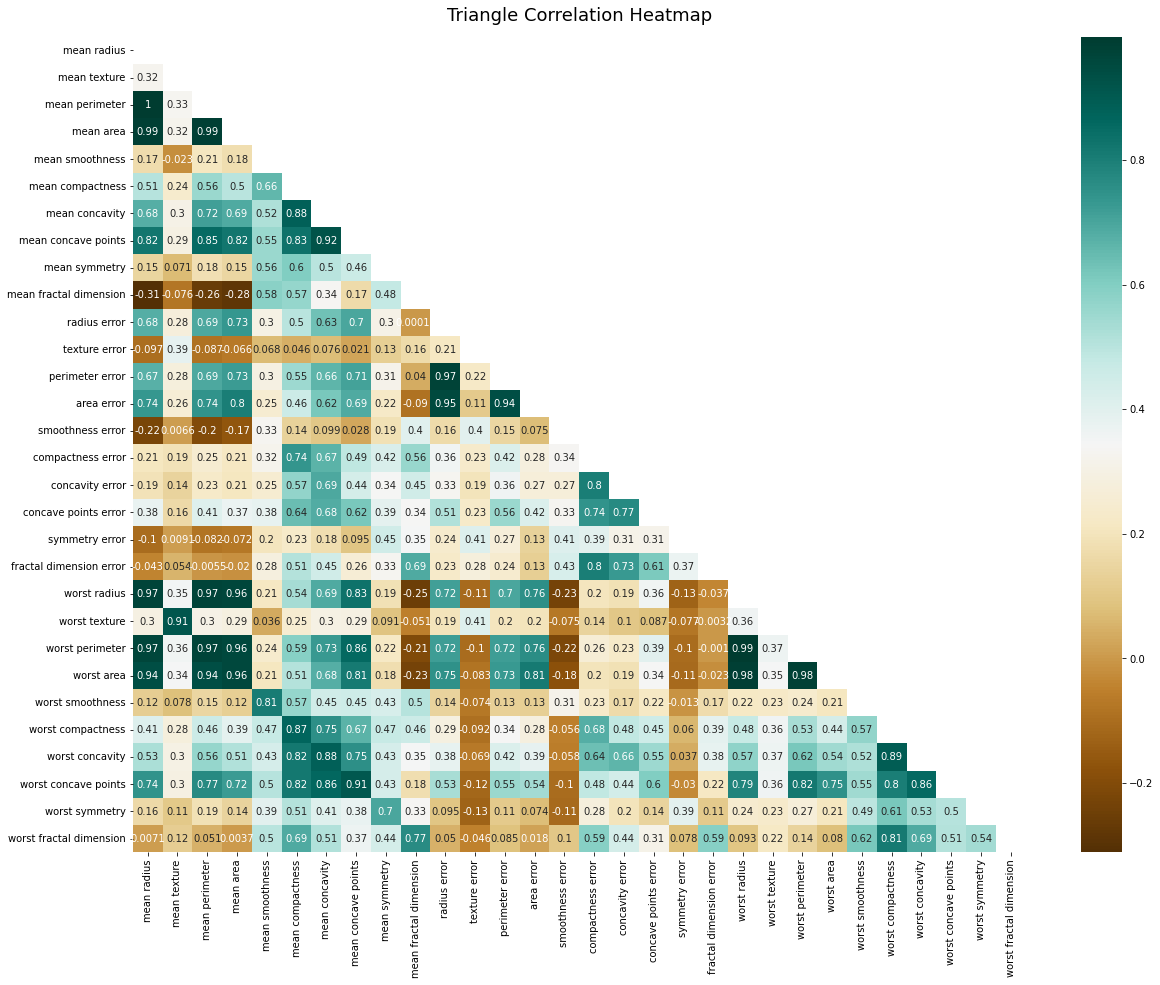

In [4]:
correlation = dataset.corr()
mask = np.triu(np.ones_like(dataset.corr()))

plt.figure(figsize=(20,15))
plt.title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
sn.heatmap(correlation, annot=True, mask=mask, cmap='BrBG')

### Create training data

In [5]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=1234)

### Create and train the model

In [6]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

## What are the most significant parameters/features ?

In [7]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00709518, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.04983189, 0.        ,
       0.        , 0.        , 0.01734378, 0.        , 0.        ,
       0.        , 0.02928952, 0.02598059, 0.11248202, 0.02119796,
       0.        , 0.00939362, 0.72738542, 0.        , 0.        ])

C:\Users\ssipikal\AppData\Local\Temp\ipykernel_25832\1015566753.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data["feature_names"], rotation=45)


<Axes:ylabel='importance'>

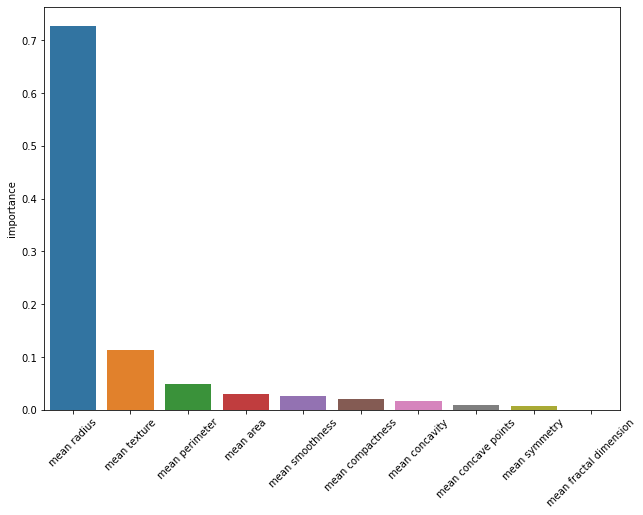

In [8]:
feature_importance = pd.DataFrame(model.feature_importances_, index = data["feature_names"], columns=["importance"]).sort_values(by="importance", axis=0, ascending=False)
feature_importance

fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xticklabels(data["feature_names"], rotation=45)
sn.barplot(data=feature_importance[0:10], x=data["feature_names"][0:10], y="importance")

## How good is our model ?

### Make predictions

In [9]:
prediction = model.predict(x_test)

### Accuracy score

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction).round(2)

0.9

### Precission score

In [11]:
from sklearn.metrics import precision_score
precision_score(y_test, prediction).round(2)

0.9

### Recall score

In [12]:
from sklearn.metrics import recall_score
recall_score(y_test, prediction).round(2)

0.94

### Confusion matrix

Text(69.0, 0.5, 'Truth')

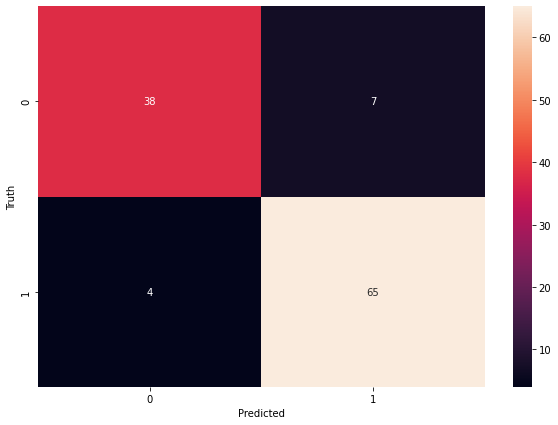

In [13]:
cm = confusion_matrix(y_test, prediction)

# Make it a little bit bigger
plt.figure(figsize=(10,7))

# Plot by seaborn
sn.heatmap(cm, annot=True)

# Add axis labels
plt.xlabel("Predicted")
plt.ylabel("Truth")

### Classification report

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction, target_names=["malignant", "benign"]))

              precision    recall  f1-score   support

   malignant       0.90      0.84      0.87        45
      benign       0.90      0.94      0.92        69

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



## Visualize the tree

[Text(0.5869565217391305, 0.9285714285714286, 'worst concave points <= 0.142\ngini = 0.465\nsamples = 455\nvalue = [167, 288]\nclass = Benign'),
 Text(0.391304347826087, 0.7857142857142857, 'worst area <= 957.45\ngini = 0.141\nsamples = 301\nvalue = [23, 278]\nclass = Benign'),
 Text(0.2608695652173913, 0.6428571428571429, 'area error <= 91.555\ngini = 0.048\nsamples = 282\nvalue = [7, 275]\nclass = Benign'),
 Text(0.21739130434782608, 0.5, 'worst perimeter <= 104.1\ngini = 0.042\nsamples = 281\nvalue = [6, 275]\nclass = Benign'),
 Text(0.08695652173913043, 0.35714285714285715, 'worst texture <= 33.27\ngini = 0.008\nsamples = 254\nvalue = [1, 253]\nclass = Benign'),
 Text(0.043478260869565216, 0.21428571428571427, 'gini = 0.0\nsamples = 236\nvalue = [0, 236]\nclass = Benign'),
 Text(0.13043478260869565, 0.21428571428571427, 'worst texture <= 33.8\ngini = 0.105\nsamples = 18\nvalue = [1, 17]\nclass = Benign'),
 Text(0.08695652173913043, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nval

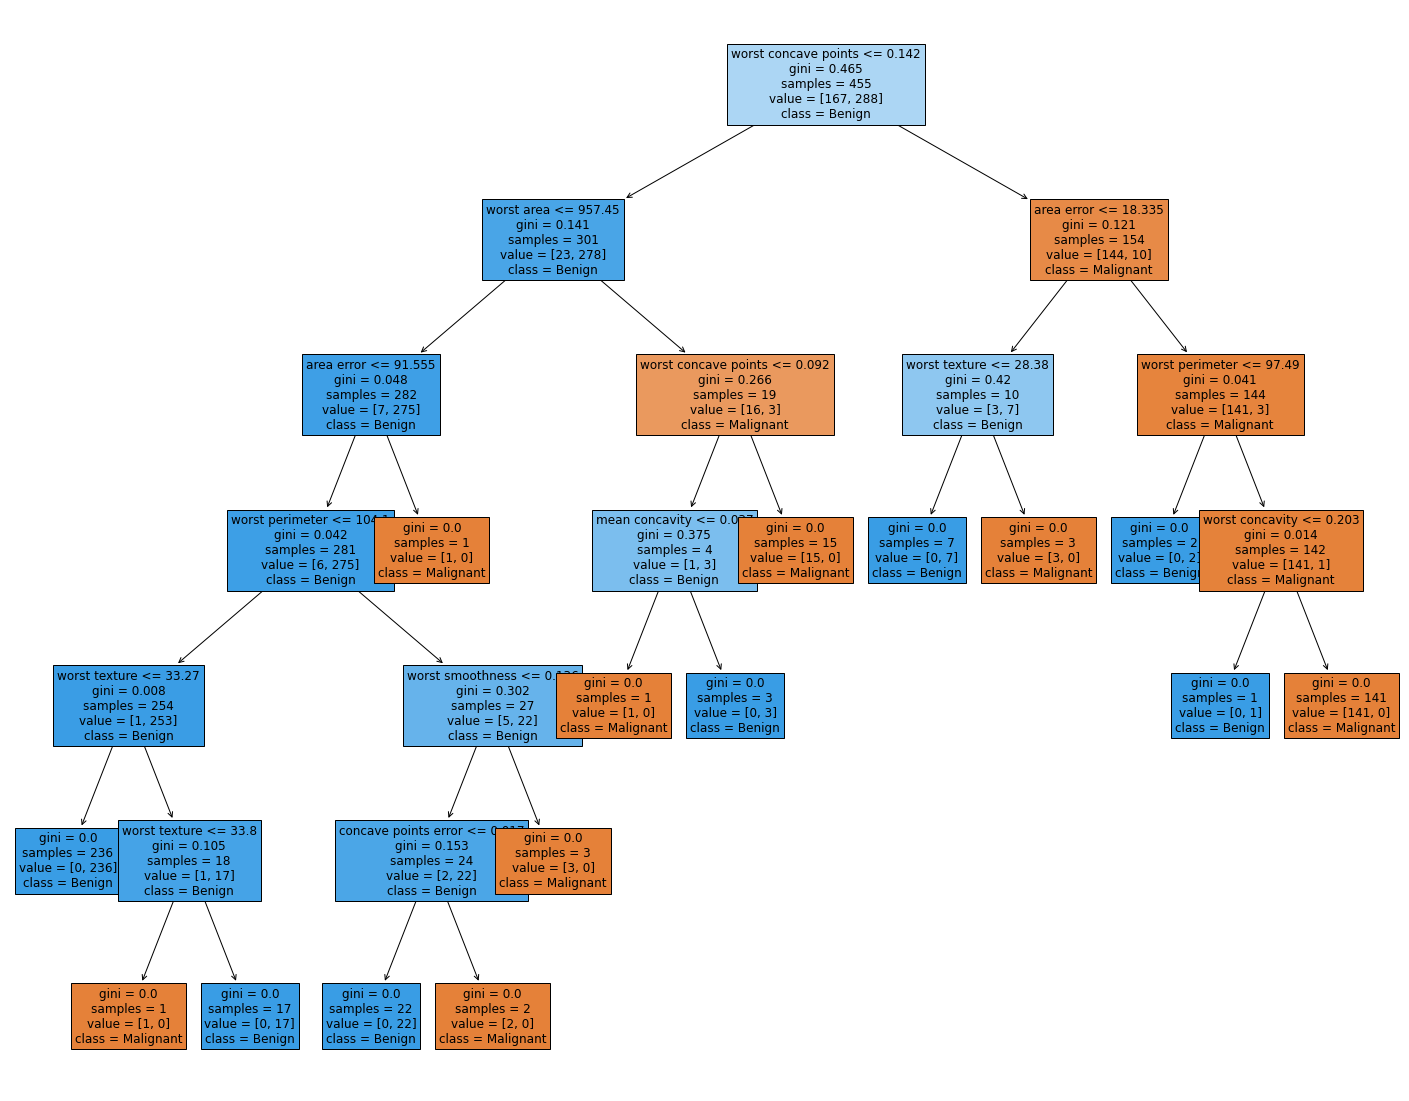

In [15]:
from sklearn import tree

fig = plt.figure(figsize=(25, 20))
tree.plot_tree(model, feature_names=data["feature_names"], class_names={0:"Malignant", 1:"Benign"}, filled=True, fontsize=12)